### Classify Reuters Newswires (Multiclass Classification) dataset

In [1]:
import numpy as np
from keras.datasets import reuters
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics

import matplotlib.pyplot as plt


/usr/local/lib/python3.6/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 0s 0us/step


In [3]:
len(train_data)

8982

In [4]:
train_labels.shape

(8982,)

In [5]:
print(len(train_data[100]), len(train_data[250]))

409 68


#### train_labels and test_labels are lists of integer between 0 and 45.

In [7]:
train_labels[10]

3

In [8]:
max([(max(sequence)) for sequence in train_data])

9999

#### Quickly decode newswires back to text:

In [10]:
word_index = reuters.get_word_index()

557056/550378 [==============================] - 0s 0us/step


In [11]:
len(word_index)

30979

In [12]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [13]:
len(reverse_word_index)

30979

In [14]:
len(train_data[0])

87

In [15]:
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [17]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [18]:
# train_data[0]
# reverse_word_index.get(16 - 3, '?')

### Preparing the data
To feed data into a neural network, we have to turn lists into tensors.
There are two ways to do that:
1. Pad your lists so that they all have the same length, turn them into an integer tensor of shape (samples, word_indices), and then use as the first layer in your network a layer capable of handling such integer tensors (the Embedding layer).
2. One-hot encode your lists to turn them into vectors of 0s and 1s. This would mean, for instance, turning the sequence [3, 5] into a 10,000-dimensional vector that would be all 0s except for indices 3 and 5, which would be 1s. Then you could use as the first layer in your network a Dense layer, capable of handling floating-point vector data.
#### Let’s go with the latter solution to vectorize the data,

In [19]:
def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [20]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [21]:
print(x_train.shape)
print(x_test.shape)

(8982, 10000)
(2246, 10000)


In [22]:
len(x_train[0])

10000

In [23]:
print(train_labels.shape)
print(train_labels[1])

(8982,)
4


#### Vectorize training and test labels

In [25]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1
    return results

In [26]:
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [27]:
print(one_hot_train_labels.shape)
print(one_hot_test_labels.shape)

(8982, 46)
(2246, 46)


In [28]:
one_hot_test_labels[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

#### Note: The input data is vectors, and the # of output classes 46. The network that performs well is a simple fully connected (Dense) layers with "Relu" activations.
### Build Model

In [29]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

#### Note: Without the activation function, the dense layer consist of two linear operations (dot product, and addition). So the layer could only learn linear transformation of the input data (the hypothesis space of the layer would be the set of all possible linear transformations of the input data into a 16-dimentional space). This is too restricted and wouldn't benifit from multiple layers of representations.
Non-linear transformation gives the access to a much richer hypothesis space.
#### Model Compilation

In [30]:
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

### Make a Validation Dataset

In [31]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

### Training Model

In [32]:
history = model.fit(partial_x_train, partial_y_train, epochs=10, 
                    batch_size=512, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/10
7982/7982 [==============================] - 6s 759us/step - loss: 2.5323 - acc: 0.4956 - val_loss: 1.7231 - val_acc: 0.6110
Epoch 2/10
7982/7982 [==============================] - 5s 677us/step - loss: 1.4480 - acc: 0.6870 - val_loss: 1.3477 - val_acc: 0.7070
Epoch 3/10
7982/7982 [==============================] - 5s 676us/step - loss: 1.0976 - acc: 0.7646 - val_loss: 1.1725 - val_acc: 0.7410
Epoch 4/10
7982/7982 [==============================] - 5s 676us/step - loss: 0.8714 - acc: 0.8153 - val_loss: 1.0799 - val_acc: 0.7580
Epoch 5/10
7982/7982 [==============================] - 5s 677us/step - loss: 0.7050 - acc: 0.8469 - val_loss: 0.9852 - val_acc: 0.7810
Epoch 6/10
7982/7982 [==============================] - 5s 688us/step - loss: 0.5687 - acc: 0.8794 - val_loss: 0.9405 - val_acc: 0.8030
Epoch 7/10
7982/7982 [==============================] - 6s 690us/step - loss: 0.4614 - acc: 0.9032 - val_loss: 0.9105 - val_acc: 0.8000


In [33]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [34]:
history_dict['val_loss']

[1.7230838775634765,
 1.347655068397522,
 1.1724714851379394,
 1.0799369163513184,
 0.9852200393676758,
 0.9405132761001587,
 0.9104517788887024,
 0.9380485105514527,
 0.8906249160766602,
 0.9070067281723022]

### Plotting the training and validation loss

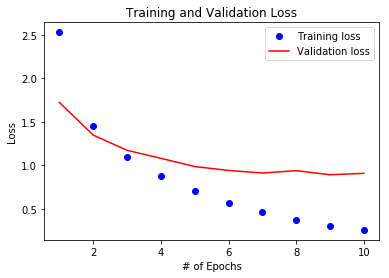

In [35]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss') # bo = blue dot
plt.plot(epochs, val_loss_values, 'r', label = 'Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('# of Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Plotting the Training and Validation accuracy

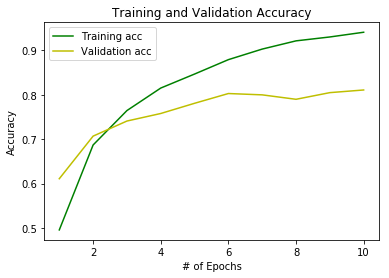

In [36]:
# plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(acc_values) + 1)

plt.plot(epochs, acc_values, 'g', label = 'Training acc') # bo = blue dot
plt.plot(epochs, val_acc_values, 'y', label = 'Validation acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('# of Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [38]:
model.fit(x_train, one_hot_train_labels, epochs=4, batch_size=512)

Epoch 1/4
8982/8982 [==============================] - 5s 591us/step - loss: 0.2952 - acc: 0.9338
Epoch 2/4
8982/8982 [==============================] - 5s 600us/step - loss: 0.2355 - acc: 0.9424
Epoch 3/4
8982/8982 [==============================] - 5s 600us/step - loss: 0.2037 - acc: 0.9466
Epoch 4/4
8982/8982 [==============================] - 5s 602us/step - loss: 0.1791 - acc: 0.9502


In [40]:
results = model.evaluate(x_test, one_hot_test_labels)

2246/2246 [==============================] - 1s 242us/step


In [41]:
results

[1.0190748219392392, 0.7943009795722215]

In [43]:
predictions = model.predict(x_test)

In [44]:
predictions[0].shape

(46,)

In [45]:
np.sum(predictions[0])

1.0

In [55]:
for i in range(10):
    pred = np.argmax(predictions[i])
    actu = test_labels[i]
    print("Actual Label:", actu, "Prediction: ", pred)

Actual Label: 3 Prediction:  3
Actual Label: 10 Prediction:  10
Actual Label: 1 Prediction:  1
Actual Label: 4 Prediction:  4
Actual Label: 4 Prediction:  13
Actual Label: 3 Prediction:  3
Actual Label: 3 Prediction:  3
Actual Label: 3 Prediction:  3
Actual Label: 3 Prediction:  3
Actual Label: 3 Prediction:  3


### A different way to handle the labels and the loss

In [56]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [58]:
y_test

array([ 3, 10,  1, ...,  3,  3, 24])

In [60]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

In [62]:
model.fit(x_train, y_train, epochs=5, batch_size=128)

Epoch 1/5
8982/8982 [==============================] - 7s 732us/step - loss: 0.2040 - acc: 0.9475
Epoch 2/5
8982/8982 [==============================] - 6s 701us/step - loss: 0.1710 - acc: 0.9515
Epoch 3/5
8982/8982 [==============================] - 6s 711us/step - loss: 0.1587 - acc: 0.9534
Epoch 4/5
8982/8982 [==============================] - 6s 702us/step - loss: 0.1497 - acc: 0.9536
Epoch 5/5
8982/8982 [==============================] - 6s 713us/step - loss: 0.1433 - acc: 0.9520


In [63]:
results = model.evaluate(x_test, y_test)

2246/2246 [==============================] - 1s 235us/step


In [64]:
results

[1.2093677240509277, 0.7876224399462196]